In [151]:
#Pandas, numpy for data processing
import pandas as pd
import numpy as np

#sklearn libraries for preprocessing, normalisation, data-splitting
from sklearn import metrics,preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict

#sklearn Random Forest Classifier and Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

#matplotlib for plots
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
#Importing Dataset - Using entire Dataset and model specific Data cleaning
dataset=pd.read_csv("Dataset/DataCoSupplyChainDataset.csv",header= 0,encoding= 'unicode_escape')
dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


Data Cleaning

In [153]:
#dropping unecessary columns
data=dataset.drop(columns=['Customer Fname','Customer Lname','Order Zipcode', 'Product Description','Customer Email','Customer Password','Customer Street','Latitude','Longitude','Order Id','Order Item Cardprod Id','Order Zipcode','Product Description','Product Image'])
data=data.drop(columns=['Days for shipment (scheduled)', 'Category Name', 'Customer City','Customer Country', 'Customer Id', 'Customer Segment', 'Customer State','Order City','Product Card Id', 'Order Country','Order Country', 'Order Customer Id'])
data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)
print(data.columns)

Index(['Type', 'Days for shipping (real)', 'Benefit per order',
       'Sales per customer', 'Delivery Status', 'Late_delivery_risk',
       'Category Id', 'Customer Zipcode', 'Department Id', 'Department Name',
       'Market', 'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Category Id', 'Product Name',
       'Product Price', 'Product Status', 'shipping date (DateOrders)',
       'Shipping Mode'],
      dtype='object')


In [154]:
data.isnull().sum()

Type                          0
Days for shipping (real)      0
Benefit per order             0
Sales per customer            0
Delivery Status               0
Late_delivery_risk            0
Category Id                   0
Customer Zipcode              0
Department Id                 0
Department Name               0
Market                        0
order date (DateOrders)       0
Order Item Discount           0
Order Item Discount Rate      0
Order Item Id                 0
Order Item Product Price      0
Order Item Profit Ratio       0
Order Item Quantity           0
Sales                         0
Order Item Total              0
Order Profit Per Order        0
Order Region                  0
Order State                   0
Order Status                  0
Product Category Id           0
Product Name                  0
Product Price                 0
Product Status                0
shipping date (DateOrders)    0
Shipping Mode                 0
dtype: int64

In [132]:
# Categorical ---> Numerical values
train_data=data.copy()
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['late_delivery']=np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)
train_data.drop(['Delivery Status','Late_delivery_risk','Order Status','order date (DateOrders)'], axis=1, inplace=True)

#Encoding Categorical Data into numeric data using a Labelencoder object
le = preprocessing.LabelEncoder()
#train_data['Customer Country']  = le.fit_transform(train_data['Customer Country'])
train_data['Market']            = le.fit_transform(train_data['Market'])
train_data['Type']              = le.fit_transform(train_data['Type'])
train_data['Product Name']      = le.fit_transform(train_data['Product Name'])
#train_data['Customer Segment']  = le.fit_transform(train_data['Customer Segment'])
#train_data['Customer State']    = le.fit_transform(train_data['Customer State'])
train_data['Order Region']      = le.fit_transform(train_data['Order Region'])
#train_data['Order City']        = le.fit_transform(train_data['Order City'])
#train_data['Category Name']     = le.fit_transform(train_data['Category Name'])
#train_data['Customer City']     = le.fit_transform(train_data['Customer City'])
train_data['Department Name']   = le.fit_transform(train_data['Department Name'])
train_data['Order State']       = le.fit_transform(train_data['Order State'])
train_data['Shipping Mode']     = le.fit_transform(train_data['Shipping Mode'])
train_data['shipping date (DateOrders)']     = le.fit_transform(train_data['shipping date (DateOrders)'])
#train_data['Order Country']     = le.fit_transform(train_data['Order Country'])
#train_data['Customer Full Name']= le.fit_transform(train_data['Customer Full Name'])
train_data.dtypes

Type                            int64
Days for shipping (real)        int64
Benefit per order             float64
Sales per customer            float64
Category Id                     int64
Customer Zipcode              float64
Department Id                   int64
Department Name                 int64
Market                          int64
Order Item Discount           float64
Order Item Discount Rate      float64
Order Item Id                   int64
Order Item Product Price      float64
Order Item Profit Ratio       float64
Order Item Quantity             int64
Sales                         float64
Order Item Total              float64
Order Profit Per Order        float64
Order Region                    int64
Order State                     int64
Product Category Id             int64
Product Name                    int64
Product Price                 float64
Product Status                  int64
shipping date (DateOrders)      int64
Shipping Mode                   int64
fraud       

In [133]:
#Test-train split for prediction of Sales
xs=train_data.loc[:, train_data.columns != 'Sales']
ys=train_data['Sales']
xs_train, xs_test,ys_train,ys_test = train_test_split(xs,ys,test_size = 0.3, random_state = 42)

#Test-train split for prediction of Items Quantity
xq=train_data.loc[:, train_data.columns != 'Order Item Quantity']
yq=train_data['Order Item Quantity']
xq_train, xq_test,yq_train,yq_test = train_test_split(xq,yq,test_size = 0.3, random_state = 42)

In [134]:
scaler=MinMaxScaler()
xs_train=scaler.fit_transform(xs_train)
xs_test=scaler.transform(xs_test)
xq_train=scaler.fit_transform(xq_train)
xq_test=scaler.transform(xq_test)

In [135]:
def regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test):
    model_s=model_s.fit(xs_train,ys_train)
    model_q=model_q.fit(xq_train,yq_train)
    ys_pred=model_s.predict(xs_test)
    yq_pred=model_q.predict(xq_test)
    print('Model parameter used are:',model_s) #Printing the model to see which parameters are used
    print("MAE of sales is         :", metrics.mean_absolute_error(ys_test,ys_pred))
    print("RMSE of sales is        :",np.sqrt(metrics.mean_squared_error(ys_test,ys_pred)))
    print("MAE of order quantity   :", metrics.mean_absolute_error(yq_test,yq_pred))
    print("RMSE of order quantity  :",np.sqrt(metrics.mean_squared_error(yq_test,yq_pred)))
    print("MSE of order quantity  :",metrics.mean_squared_error(yq_test,yq_pred))

In [136]:
model_s = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
model_q = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameter used are: RandomForestRegressor(max_depth=10, random_state=40)
MAE of sales is         : 0.20533165652359966
RMSE of sales is        : 1.7805923203160938
MAE of order quantity   : 6.425880788832257e-05
RMSE of order quantity  : 0.005136801983579812
MSE of order quantity  : 2.6386734618509488e-05


Random Forest Classifier - Incomplete

In [146]:
xq=train_data.loc[:, train_data.columns != 'Sales']
yq=train_data['Sales']
xq_train, xq_test,yq_train,yq_test = train_test_split(xq,yq,test_size = 0.3, random_state = 42)

In [147]:
xq_train.head()

,Type,Days for shipping (real),Benefit per order,Sales per customer,Category Id,Customer Zipcode,Department Id,Department Name,Market,Order Item Discount,...,Order Region,Order State,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,fraud,late_delivery
99963,3,6,-190.570007,122.949997,46,45601.0,7,3,4,26.990000,...,21,718,46,67,49.980000,0,50448,2,0,1
63538,0,3,-9.960000,199.250000,70,58501.0,4,0,3,11.600000,...,7,9,70,48,210.850006,0,15807,3,0,0
6661,2,2,52.910000,151.169998,17,725.0,4,0,3,28.799999,...,13,610,17,71,59.990002,0,30108,3,0,0
93913,1,4,3.900000,97.489998,18,93536.0,4,0,3,32.500000,...,7,421,18,56,129.990005,0,26475,3,0,0
90626,2,3,-22.150000,103.989998,18,921.0,4,0,1,26.000000,...,10,325,18,56,129.990005,0,59857,3,0,0


In [148]:
clf = RandomForestClassifier(bootstrap=True,ccp_alpha=0.0,
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None,)


In [149]:
clf.fit(xq_train, yq_train)

ValueError: Unknown label type: 'continuous'

In [150]:
prediction_test = clf.predict(xq_test)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [142]:
prediction_test

array([1, 5, 5, ..., 3, 5, 1])

In [143]:
print("F1 score of order quantity",metrics.f1_score(yq_test, prediction_test, average='micro'))
print("Accuracy Score of order quantity: ",metrics.accuracy_score(yq_test, prediction_test))
print("MAE of order quantity   :", metrics.mean_absolute_error(yq_test,prediction_test))
print("RMSE of order quantity  :",np.sqrt(metrics.mean_squared_error(yq_test,prediction_test)))
print("MSE of order quantity  :",metrics.mean_squared_error(yq_test,prediction_test))

F1 score of order quantity 1.0
Accuracy Score of order quantity:  1.0
MAE of order quantity   : 0.0
RMSE of order quantity  : 0.0
MSE of order quantity  : 0.0


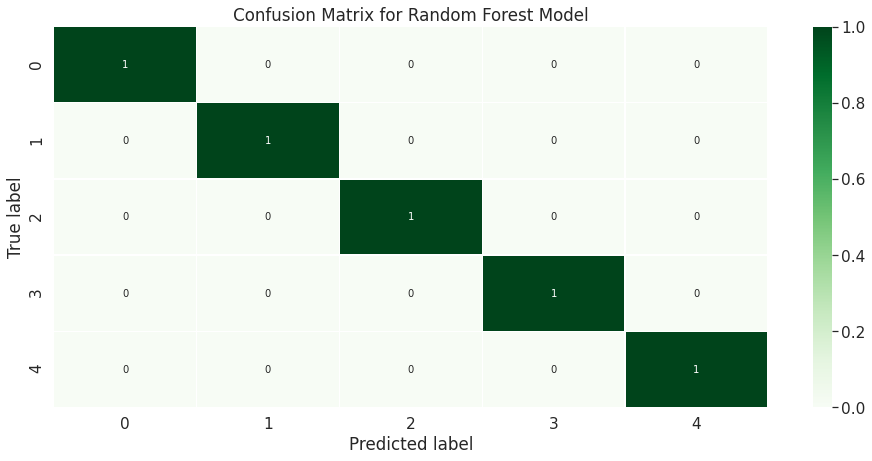

In [144]:
# Get and reshape confusion matrix data
matrix = metrics.confusion_matrix(yq_test, prediction_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
# tick_marks = np.arange(len(class_names))
# tick_marks2 = tick_marks + 0.5
# plt.xticks(tick_marks, class_names, rotation=25)
# plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [145]:
print(metrics.classification_report(yq_test, prediction_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     30014
           2       1.00      1.00      1.00      5978
           3       1.00      1.00      1.00      6074
           4       1.00      1.00      1.00      6005
           5       1.00      1.00      1.00      6085

    accuracy                           1.00     54156
   macro avg       1.00      1.00      1.00     54156
weighted avg       1.00      1.00      1.00     54156

